# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df = pd.read_csv("../assets/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### What are the predictors and dependent variable ?

Predictor is admit. Dependent variables are gre, gpa, and prestige

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

Answer: Students with a higher GRE are more likely to be admitted to grad school

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e68f850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11edf9890>]], dtype=object)

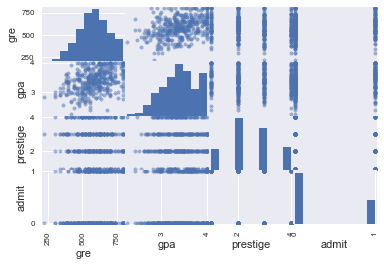

In [63]:
pd.scatter_matrix(df[['gre','gpa', 'prestige','admit']])


### FInd the correlation of each feature with admission

In [64]:
df.corr()["admit"][1:]

gre         0.182919
gpa         0.175952
prestige   -0.241355
Name: admit, dtype: float64

### How do you deal with the prestige feature?

In [80]:
#Dummy variable

from sklearn import linear_model as lm
dummy_prestige = pd.get_dummies(df.prestige,prefix="prestige")
df2 = df.join(dummy_prestige)
df2.dropna(inplace=True)
df2.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [81]:
df3 = df2.drop('prestige_4.0', axis=1)
print df3.head()

   admit    gre   gpa  prestige  prestige_1.0  prestige_2.0  prestige_3.0
0      0  380.0  3.61       3.0             0             0             1
1      1  660.0  3.67       3.0             0             0             1
2      1  800.0  4.00       1.0             1             0             0
3      1  640.0  3.19       4.0             0             0             0
4      0  520.0  2.93       4.0             0             0             0


In [82]:
df3.dropna(inplace=True)

In [83]:
x = df3.drop('admit', axis=1)
y = df3.admit

from sklearn import linear_model as lm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_feature = sc.fit_transform(x)

from sklearn import grid_search
parameters = {'Cs':[i for i in range(1, 10)],'class_weight':['balanced',None]
             ,'fit_intercept':[True,False]}
model = grid_search.GridSearchCV(lm.LogisticRegressionCV(), parameters,
                               scoring='accuracy')
model.fit(scaled_feature, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'fit_intercept': [True, False], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [84]:
print model.best_estimator_
print model.best_score_

LogisticRegressionCV(Cs=9, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)
0.715365239295


### What is the most important feature that contributes to the students probability of admission? 

In [85]:
zip(features,model.best_estimator_.coef_[0])

[(u'gre', 0.2355995338956646),
 (u'gpa', 0.26632223585749309),
 (u'prestige_1.0', -0.28117122916890608),
 (u'prestige_2.0', 0.19354513327963066),
 (u'prestige_3.0', 0.089413813981044366)]

Prestige 1, GPA, then GRE

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [87]:
df2["model_predict"] = model.predict_proba(scaled_feature)[:,1]

/Users/Shaan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


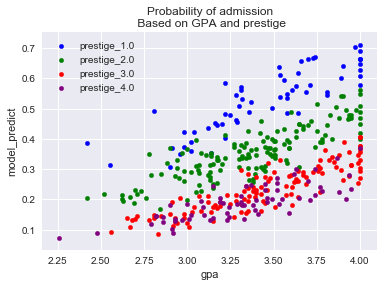

In [88]:
ax = plt.subplot(111)
prestige_features = ["prestige_1.0","prestige_2.0","prestige_3.0","prestige_4.0"]
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df2[df2[prestige_features[e]] == 1].plot(x='gpa', y='model_predict', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of admission\n Based on GPA and prestige')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels=prestige_features, loc='best')  # legend for first two lines only

For a given GPA, the prestige of the university still has a large impact on admission